# Simple Discrete Cascade

Simple version based on binary predictive motif in peaks and discrete peak->gene links. 

In [13]:
library(ggplot2)
library(Matrix)
library(rtracklayer)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:Matrix’:

    which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unspl

## Load Data

In [25]:
peak_set = read.table("../20200206_pmat_snapATAC/sessions/20201022_n53906/peaks.bed")
peak_set = paste(peak_set$V1, paste(peak_set$V2, peak_set$V3, sep='-'), sep=':')

length(peak_set)
head(peak_set)

[1] 414473

[1] "chr1:10268-10885" "chr1:41988-42505" "chr1:46058-46558" "chr1:48200-48959"
[5] "chr1:51306-52190" "chr1:58644-59144"

In [8]:
# motif x peaks matrix
motifs_bpnet_hits = readMM("../20200723_motif_annotation/bpnet_scores/20201020_n62402/peaks.overlap.hits.bpnet.no_iPSC.FDR_0.1.mm")

In [9]:
dim(motifs_bpnet_hits)

[1] 414473    123

In [10]:
motif_bpnet_hits_names = read.table("../20200723_motif_annotation/bpnet_scores/20201020_n62402//peaks.overlap.hits.bpnet.no_iPSC.FDR_0.1.motif.names.txt")
motif_bpnet_hits_names = as.character(unlist(motif_bpnet_hits_names$V1))

In [16]:
colnames(motifs_bpnet_hits) = motif_bpnet_hits_names

In [4]:
p2g_links = read.table("../20200925_Peak2Gene/peak2gene_links/RNA_20200913_n59369/ATAC_20201022_n53906/20200925_cor0.45.tsv", 
                      header=T)
head(p2g_links)

,peak,gene,Correlation,FDR,VarQATAC,VarQRNA
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr1:923483-926163,LINC02593,0.4820611,3.363587e-29,0.9769804,0.3009527
2,chr1:817119-819607,SAMD11,0.6540822,1.956371e-60,0.9975270,0.7413192
3,chr1:851303-852222,SAMD11,0.5276064,9.179276e-36,0.7205198,0.7413192
4,chr1:923483-926163,SAMD11,0.5728097,2.349152e-43,0.9769804,0.7413192
5,chr1:939927-941224,SAMD11,0.4925540,1.263353e-30,0.9743192,0.7413192
6,chr1:943967-945245,SAMD11,0.6235290,2.033499e-53,0.9856975,0.7413192


In [385]:
min(p2g_links$Correlation)

[1] 0.4500048

### Pseudotime Binned Expression

In [526]:
binned_pst_expr = read.table("../20201025_trajectory_viz/out/ATAC_20201022_n53906_RNA_20200913_n59369/expr_binned_20_path_1_7_11_12_13_14.tsv")
head(binned_pst_expr)

,X1.ATAC.D0.RNA.D0,X2.ATAC.D0.RNA.D0,X3.ATAC.D0.RNA.D0,X4.ATAC.D0.RNA.D0,X5.ATAC.D0.RNA.D0,X6.ATAC.D0.RNA.D0,X7.ATAC.D0.RNA.D2,X8.ATAC.D4.RNA.D6,X9.ATAC.D6.RNA.D6,X10.ATAC.D6.RNA.D6,X11.ATAC.D6.RNA.D8,X12.ATAC.D6.RNA.D8,X13.ATAC.D8.RNA.D8,X14.ATAC.D12.RNA.D10,X15.ATAC.D14.RNA.D12,X16.ATAC.D14.RNA.D12,X17.ATAC.D14.RNA.D14,X18.ATAC.D14.RNA.D14,X19.ATAC.D14.RNA.D14,X20.ATAC.D14.RNA.D14
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AL627309.1,2,4,3,3,0,1,1,4,4,3,5,4,4,7,3,4,9,4,7,2
AL627309.5,11,8,13,4,8,9,4,13,8,10,22,23,13,19,12,14,19,18,23,20
AP006222.2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
LINC01409,33,48,51,44,43,45,54,82,91,85,97,111,95,58,74,84,80,75,79,62
FAM87B,1,0,2,0,3,0,0,2,10,2,2,3,4,4,0,1,2,1,0,2
LINC01128,120,110,151,150,169,166,239,348,366,288,322,299,263,176,195,203,172,163,161,155


In [527]:
library(DESeq2)

Loading required package: SummarizedExperiment

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: DelayedArray

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians


Loading required package: BiocParallel


Attaching package: ‘DelayedArray’


The following objects are masked from ‘package:matrixStats’:

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges


The following objects are masked from ‘package:base’:

    aperm, apply, rowsum




In [528]:
binned_pst_expr_norm = t(t(binned_pst_expr)/estimateSizeFactorsForMatrix(binned_pst_expr))
head(binned_pst_expr_norm)

,X1.ATAC.D0.RNA.D0,X2.ATAC.D0.RNA.D0,X3.ATAC.D0.RNA.D0,X4.ATAC.D0.RNA.D0,X5.ATAC.D0.RNA.D0,X6.ATAC.D0.RNA.D0,X7.ATAC.D0.RNA.D2,X8.ATAC.D4.RNA.D6,X9.ATAC.D6.RNA.D6,X10.ATAC.D6.RNA.D6,X11.ATAC.D6.RNA.D8,X12.ATAC.D6.RNA.D8,X13.ATAC.D8.RNA.D8,X14.ATAC.D12.RNA.D10,X15.ATAC.D14.RNA.D12,X16.ATAC.D14.RNA.D12,X17.ATAC.D14.RNA.D14,X18.ATAC.D14.RNA.D14,X19.ATAC.D14.RNA.D14,X20.ATAC.D14.RNA.D14
AL627309.1,2.671616,5.055452,3.720258,3.561948,0.000000,1.093971,0.96685,3.118131,3.031633,2.394062,3.986974,3.331965,3.4610305,6.7018299,3.035025,3.9603587,8.929665,4.053828,7.371072,2.140049
AL627309.5,14.693890,10.110904,16.121117,4.749264,8.927212,9.845735,3.86740,10.133927,6.063266,7.980206,17.542685,19.158797,11.2483492,18.1906811,12.140099,13.8612554,18.851516,18.242224,24.219236,21.400487
AP006222.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.8652576,0.9574043,0.000000,0.0000000,0.000000,0.000000,0.000000,1.070024
LINC01409,44.081670,60.665425,63.244382,52.241903,47.983766,49.228673,52.20990,63.921690,68.969650,67.831753,77.347293,92.462018,82.1994752,55.5294475,74.863943,83.1675325,79.374804,76.009268,83.187810,66.341510
FAM87B,1.335808,0.000000,2.480172,0.000000,3.347705,0.000000,0.00000,1.559066,7.579082,1.596041,1.594790,2.498973,3.4610305,3.8296171,0.000000,0.9900897,1.984370,1.013457,0.000000,2.140049
LINC01128,160.296983,139.024932,187.252974,178.097395,188.587361,181.599104,231.07716,271.277418,277.394415,229.829941,256.761118,249.064355,227.5627575,168.5031509,197.276607,200.9882036,170.655829,165.193476,169.534650,165.853776


In [530]:
binned_pst_expr_tpm = 1e6 * t(t(binned_pst_expr)/colSums(binned_pst_expr))
head(binned_pst_expr_tpm)

,X1.ATAC.D0.RNA.D0,X2.ATAC.D0.RNA.D0,X3.ATAC.D0.RNA.D0,X4.ATAC.D0.RNA.D0,X5.ATAC.D0.RNA.D0,X6.ATAC.D0.RNA.D0,X7.ATAC.D0.RNA.D2,X8.ATAC.D4.RNA.D6,X9.ATAC.D6.RNA.D6,X10.ATAC.D6.RNA.D6,X11.ATAC.D6.RNA.D8,X12.ATAC.D6.RNA.D8,X13.ATAC.D8.RNA.D8,X14.ATAC.D12.RNA.D10,X15.ATAC.D14.RNA.D12,X16.ATAC.D14.RNA.D12,X17.ATAC.D14.RNA.D14,X18.ATAC.D14.RNA.D14,X19.ATAC.D14.RNA.D14,X20.ATAC.D14.RNA.D14
AL627309.1,0.1119610,0.2139336,0.1580202,0.1518808,0.0000000,0.04741742,0.04206716,0.13111208,0.1283950,0.10027276,0.16682157,0.1403505,0.14763836,0.28506737,0.1246092,0.15848534,0.3479841,0.15554088,0.2796964,0.0811364
AL627309.5,0.6157855,0.4278671,0.6847544,0.2025077,0.3832066,0.42675682,0.16826865,0.42611425,0.2567901,0.33424253,0.73401489,0.8070151,0.47982466,0.77375429,0.4984367,0.55469870,0.7346331,0.69993396,0.9190024,0.8113640
AP006222.2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.03690959,0.04072391,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.0405682
LINC01409,1.8473565,2.5672027,2.6863440,2.2275844,2.0597353,2.13378409,2.27162674,2.68779756,2.9209873,2.84106149,3.23633838,3.8947252,3.50641101,2.36198677,3.0736928,3.32819220,3.0931920,2.91639149,3.1565735,2.5152285
FAM87B,0.0559805,0.0000000,0.1053468,0.0000000,0.1437025,0.00000000,0.00000000,0.06555604,0.3209876,0.06684851,0.06672863,0.1052628,0.14763836,0.16289564,0.0000000,0.03962134,0.0773298,0.03888522,0.0000000,0.0811364
LINC01128,6.7176601,5.8831728,7.9536853,7.5940377,8.0952387,7.87129242,10.05405168,11.40675063,11.7481467,9.62618483,10.74330885,10.4911968,9.70722206,7.16740813,8.0995960,8.04313115,6.6503627,6.33829084,6.4330168,6.2880712


## Process

### TF -> Gene Linking

In [143]:
colnames(motifs_bpnet_hits)[grep("ctcf", colnames(motifs_bpnet_hits), ignore.case=T)]

[1] "CTCF_HUMAN.H11MO.0.A"  "CTCF_MA0139.1"         "CTCF_MOUSE.H11MO.0.A" 
[4] "CTCFL_HUMAN.H11MO.0.A" "CTCFL_MOUSE.H11MO.0.A"

In [402]:
GENE = "ZFP42"
cur_peaks = p2g_links[p2g_links$gene==GENE, ]$peak

length(cur_peaks)
head(p2g_links[p2g_links$gene==GENE, ])

[1] 29

,peak,gene,Correlation,FDR,VarQATAC,VarQRNA
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
70053,chr4:187798433-187798951,ZFP42,0.7261814,9.326268e-81,0.7882492,0.946119
70054,chr4:187826651-187827327,ZFP42,0.5851090,1.237343e-45,0.5240655,0.946119
70055,chr4:187946415-187947146,ZFP42,0.5258591,1.712946e-35,0.5796276,0.946119
70056,chr4:187974509-187975314,ZFP42,0.7359963,4.884544e-84,0.7418312,0.946119
70057,chr4:187975938-187977347,ZFP42,0.6789649,8.685398e-67,0.7978734,0.946119
70058,chr4:187995394-187996252,ZFP42,0.8753799,1.527537e-155,0.9874274,0.946119


In [403]:
sum(peak_set %in% cur_peaks) == length(cur_peaks)

[1] TRUE

In [404]:
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"PO5F1_HUMAN.H11MO.0.A"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"SOX2_MOUSE.H11MO.0.A"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"Pou5f1+Sox2_MA0142.1"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"KLF4_HUMAN.H11MO.0.A"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"FOS+JUND_MA1141.1"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"AP2C_HUMAN.H11MO.0.A"])/length(cur_peaks)
sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"CTCF_HUMAN.H11MO.0.A"])/length(cur_peaks)

[1] 0.137931

[1] 0.06896552

[1] 0.1724138

[1] 0.3448276

[1] 0.1034483

[1] 0.137931

[1] 0.137931

In [405]:
cur_peaks[motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"KLF4_HUMAN.H11MO.0.A"]]

[1] chr4:187974509-187975314 chr4:187995394-187996252 chr4:188014932-188015460
 [4] chr4:188041545-188043757 chr4:188075000-188075952 chr4:188081208-188081827
 [7] chr4:188107538-188108878 chr4:188109125-188110336 chr4:188111879-188112379
[10] chr4:188114989-188115552
57519 Levels: chr1:100020459-100020967 ... chrX:9927541-9928576

In [406]:
sum(motifs_bpnet_hits[,"PO5F1_HUMAN.H11MO.0.A"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"SOX2_MOUSE.H11MO.0.A"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"Pou5f1+Sox2_MA0142.1"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"KLF4_HUMAN.H11MO.0.A"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"FOS+JUND_MA1141.1"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"AP2C_HUMAN.H11MO.0.A"])/nrow(motifs_bpnet_hits)
sum(motifs_bpnet_hits[,"CTCF_HUMAN.H11MO.0.A"])/nrow(motifs_bpnet_hits)

[1] 0.08384623

[1] 0.06912875

[1] 0.08101131

[1] 0.1533683

[1] 0.1792276

[1] 0.06329725

[1] 0.1352175

In [224]:
binom.test(sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks) ,"KLF4_HUMAN.H11MO.0.A"]), # successes
           length(cur_peaks),  # num_tests
           p=(sum(motifs_bpnet_hits[,"KLF4_HUMAN.H11MO.0.A"])/nrow(motifs_bpnet_hits)), 
           alternative="greater")


	Exact binomial test

data:  sum(motifs_bpnet_hits[which(peak_set %in% cur_peaks), "KLF4_HUMAN.H11MO.0.A"]) and length(cur_peaks)
number of successes = 10, number of trials = 35, p-value = 0.03349
alternative hypothesis: true probability of success is greater than 0.1533683
95 percent confidence interval:
 0.163957 1.000000
sample estimates:
probability of success 
             0.2857143 


## TF-> Gene Fraction Score Viz

Calculate TF->Gene Score as fraction of linked peaks for gene that contain a motif hit for TF. Normalize per TF.

In [386]:
links_per_gene = table(p2g_links$gene)

In [787]:
SELECTED_MOTIFS = c("PO5F1_HUMAN.H11MO.0.A",
                   "SOX2_MOUSE.H11MO.0.A",
                   "Pou5f1+Sox2_MA0142.1",
                   "KLF4_HUMAN.H11MO.0.A",
                   "AP2C_HUMAN.H11MO.0.A",
                   "CTCF_HUMAN.H11MO.0.A",

                   "FOS+JUND_MA1141.1",
                   "RUNX1_MOUSE.H11MO.0.A"
                   )

MOTIF_GENES = c("POU5F1", 
              "SOX2",
              "SOX2",
              "KLF4",
               "TFAP2C",
               "CTCF",
               
               "FOS",
               "RUNX1"
              )

SELECTED_GENES = c("TFAP2C",
                   "NANOG",
                   "UTF1",
                   "ZFP42",                   
                   "TET1",
                   "NODAL",
                   "DPPA2",
                   "DPPA3",
                   "DPPA5",
                   "DNMT3B",
                   "LIN28A",
                   "TERT",
                   "APOE",
                   
                   "JUN",
                   "FN1",
                   "MMP1",
                   "COL1A1"
                  )
all(MOTIF_GENES %in% rownames(binned_pst_expr))
all(SELECTED_GENES %in% unique(p2g_links$gene))

[1] TRUE

[1] TRUE

In [788]:
links_per_gene[SELECTED_GENES]


TFAP2C  NANOG   UTF1  ZFP42   TET1  NODAL  DPPA2  DPPA3  DPPA5 DNMT3B LIN28A 
    35     35     33     29     15     15     20     26     18     13     16 
  TERT   APOE    JUN    FN1   MMP1 COL1A1 
    23     11     18     29     23     39 

In [789]:
links_per_gene_per_tf = list()

for (tf in SELECTED_MOTIFS) {
    links_per_gene_per_tf[[tf]] = table(p2g_links[p2g_links$peak %in% peak_set[motifs_bpnet_hits[,tf]], "gene"])
}

In [810]:
tf_gene_score = list()

for (tf in SELECTED_MOTIFS) {
    tf_gene_score[[tf]] = links_per_gene_per_tf[[tf]][SELECTED_GENES]/links_per_gene[SELECTED_GENES]

    # 0-1
    tf_gene_score[[tf]] = tf_gene_score[[tf]]/max(tf_gene_score[[tf]])
    
    # or rank
#     names = names(tf_gene_score[[tf]])
#     tf_gene_score[[tf]] = order(order(tf_gene_score[[tf]]))/length(tf_gene_score[[tf]])
#     names(tf_gene_score[[tf]]) = names
}

In [811]:
tf_gene_score

$PO5F1_HUMAN.H11MO.0.A

   TFAP2C     NANOG      UTF1     ZFP42      TET1     NODAL     DPPA2     DPPA3 
0.9000000 0.7714286 0.2727273 0.6206897 0.6000000 0.6000000 0.4500000 0.5192308 
    DPPA5    DNMT3B    LIN28A      TERT      APOE       JUN       FN1      MMP1 
1.0000000 0.3461538 0.2812500 0.1956522 0.4090909 0.5000000 0.3103448 0.0000000 
   COL1A1 
0.1153846 

$SOX2_MOUSE.H11MO.0.A

   TFAP2C     NANOG      UTF1     ZFP42      TET1     NODAL     DPPA2     DPPA3 
1.0000000 0.8571429 0.6060606 0.3448276 0.3333333 0.3333333 0.2500000 0.5769231 
    DPPA5    DNMT3B    LIN28A      TERT      APOE       JUN       FN1      MMP1 
0.8333333 0.3846154 0.3125000 0.2173913 0.4545455 0.2777778 0.3448276 0.0000000 
   COL1A1 
0.1282051 

$`Pou5f1+Sox2_MA0142.1`

   TFAP2C     NANOG      UTF1     ZFP42      TET1     NODAL     DPPA2     DPPA3 
1.0000000 0.8571429 0.6060606 0.8620690 0.3333333 0.6666667 0.7500000 0.5769231 
    DPPA5    DNMT3B    LIN28A      TERT      APOE       JUN       FN1   

In [812]:
log_tpm_selected = log2(1+binned_pst_expr_tpm[unique(c(SELECTED_GENES, MOTIF_GENES)),])

log_tpm_selected_minmax = (log_tpm_selected - rowMin(log_tpm_selected))/(rowMax(log_tpm_selected) - rowMin(log_tpm_selected))

In [813]:
# inflated TPM estimates than when cells subsetted to D0 (fibroblasts)
binned_pst_expr_tpm["POU5F1", ]

X1.ATAC.D0.RNA.D0    X2.ATAC.D0.RNA.D0    X3.ATAC.D0.RNA.D0 
            312.9870             498.1978             171.5046 
   X4.ATAC.D0.RNA.D0    X5.ATAC.D0.RNA.D0    X6.ATAC.D0.RNA.D0 
            469.7165             291.6681             273.3140 
   X7.ATAC.D0.RNA.D2    X8.ATAC.D4.RNA.D6    X9.ATAC.D6.RNA.D6 
           1338.8716            2547.1799            1908.9133 
  X10.ATAC.D6.RNA.D6   X11.ATAC.D6.RNA.D8   X12.ATAC.D6.RNA.D8 
           2015.4824            2139.3198            2018.1343 
  X13.ATAC.D8.RNA.D8 X14.ATAC.D12.RNA.D10 X15.ATAC.D14.RNA.D12 
           1937.8642            1580.0877            1031.6808 
X16.ATAC.D14.RNA.D12 X17.ATAC.D14.RNA.D14 X18.ATAC.D14.RNA.D14 
           1152.7828            1252.4721            1278.2349 
X19.ATAC.D14.RNA.D14 X20.ATAC.D14.RNA.D14 
           1285.5645            1283.7402

In [814]:
gene_on_off = (log_tpm_selected_minmax > 0.5)

# TODO: currently first few time steps have mixed cells from >D0 also, which is leading to a higher estimate
# of OSK amounts than in actual fibroblasts

# for now not allowing OSK to turn off
for (g in c("POU5F1", "SOX2", "KLF4")) {
    start = min(which(gene_on_off[g, ]))
    gene_on_off[g, start:ncol(gene_on_off)] = T
}

gene_on_off

,X1.ATAC.D0.RNA.D0,X2.ATAC.D0.RNA.D0,X3.ATAC.D0.RNA.D0,X4.ATAC.D0.RNA.D0,X5.ATAC.D0.RNA.D0,X6.ATAC.D0.RNA.D0,X7.ATAC.D0.RNA.D2,X8.ATAC.D4.RNA.D6,X9.ATAC.D6.RNA.D6,X10.ATAC.D6.RNA.D6,X11.ATAC.D6.RNA.D8,X12.ATAC.D6.RNA.D8,X13.ATAC.D8.RNA.D8,X14.ATAC.D12.RNA.D10,X15.ATAC.D14.RNA.D12,X16.ATAC.D14.RNA.D12,X17.ATAC.D14.RNA.D14,X18.ATAC.D14.RNA.D14,X19.ATAC.D14.RNA.D14,X20.ATAC.D14.RNA.D14
TFAP2C,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
NANOG,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
UTF1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
ZFP42,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TET1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
NODAL,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
DPPA2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
DPPA3,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
DPPA5,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
DNMT3B,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [815]:
SELECTED_COLS = c(7, 8, 13, 20)

In [839]:
plot = ggplot() + theme_void()

SZFACTOR=1.5
THRESH=0.5
X_GAP = 4

i_base = floor((length(SELECTED_GENES)-length(SELECTED_MOTIFS))/2)

for (c in seq(length(SELECTED_COLS))) {
    
    active_genes = names(which(gene_on_off[, SELECTED_COLS[c]]))
    x_offset = (c-1)*X_GAP
    
    for (i in seq(length(SELECTED_MOTIFS))) {
        colour="black"
        if (!MOTIF_GENES[i] %in% active_genes) {
            colour="gray"
        }
        
        plot = plot +annotate("text", x= -0.1 + x_offset, y=i+i_base, hjust=1,label=strsplit(SELECTED_MOTIFS[i], "_")[[1]][1])
        plot = plot+annotate("point", x=0 + x_offset, y=i+i_base, size=5, colour=colour)
    }

    for (i in seq(length(SELECTED_GENES))) {
        colour = "black"
        if (!SELECTED_GENES[i] %in% active_genes) {
            colour = "gray"
        }
        
        plot = plot +annotate("text", x= 1.6 + x_offset, y=i, hjust=0,label=SELECTED_GENES[i])
        plot = plot+annotate("point", x=1.5 + x_offset, y=i, size=5, colour=colour)
    }

    for (i in seq(length(SELECTED_MOTIFS))) {
        for (j in seq(length(SELECTED_GENES))) {
            score = tf_gene_score[[SELECTED_MOTIFS[i]]][SELECTED_GENES[j]]
  
            if ((score > THRESH) && (SELECTED_GENES[j] %in% active_genes) && (MOTIF_GENES[i] %in% active_genes)) {                
                plot = plot + annotate("segment", x=0 + x_offset, xend=1.5 + x_offset,
                                      y=i+i_base, yend=j,
                                      size=SZFACTOR*(score-THRESH+0.1),
#                                       colour=colour,
                                      alpha=score
                                      )
            }
        }
    }
}

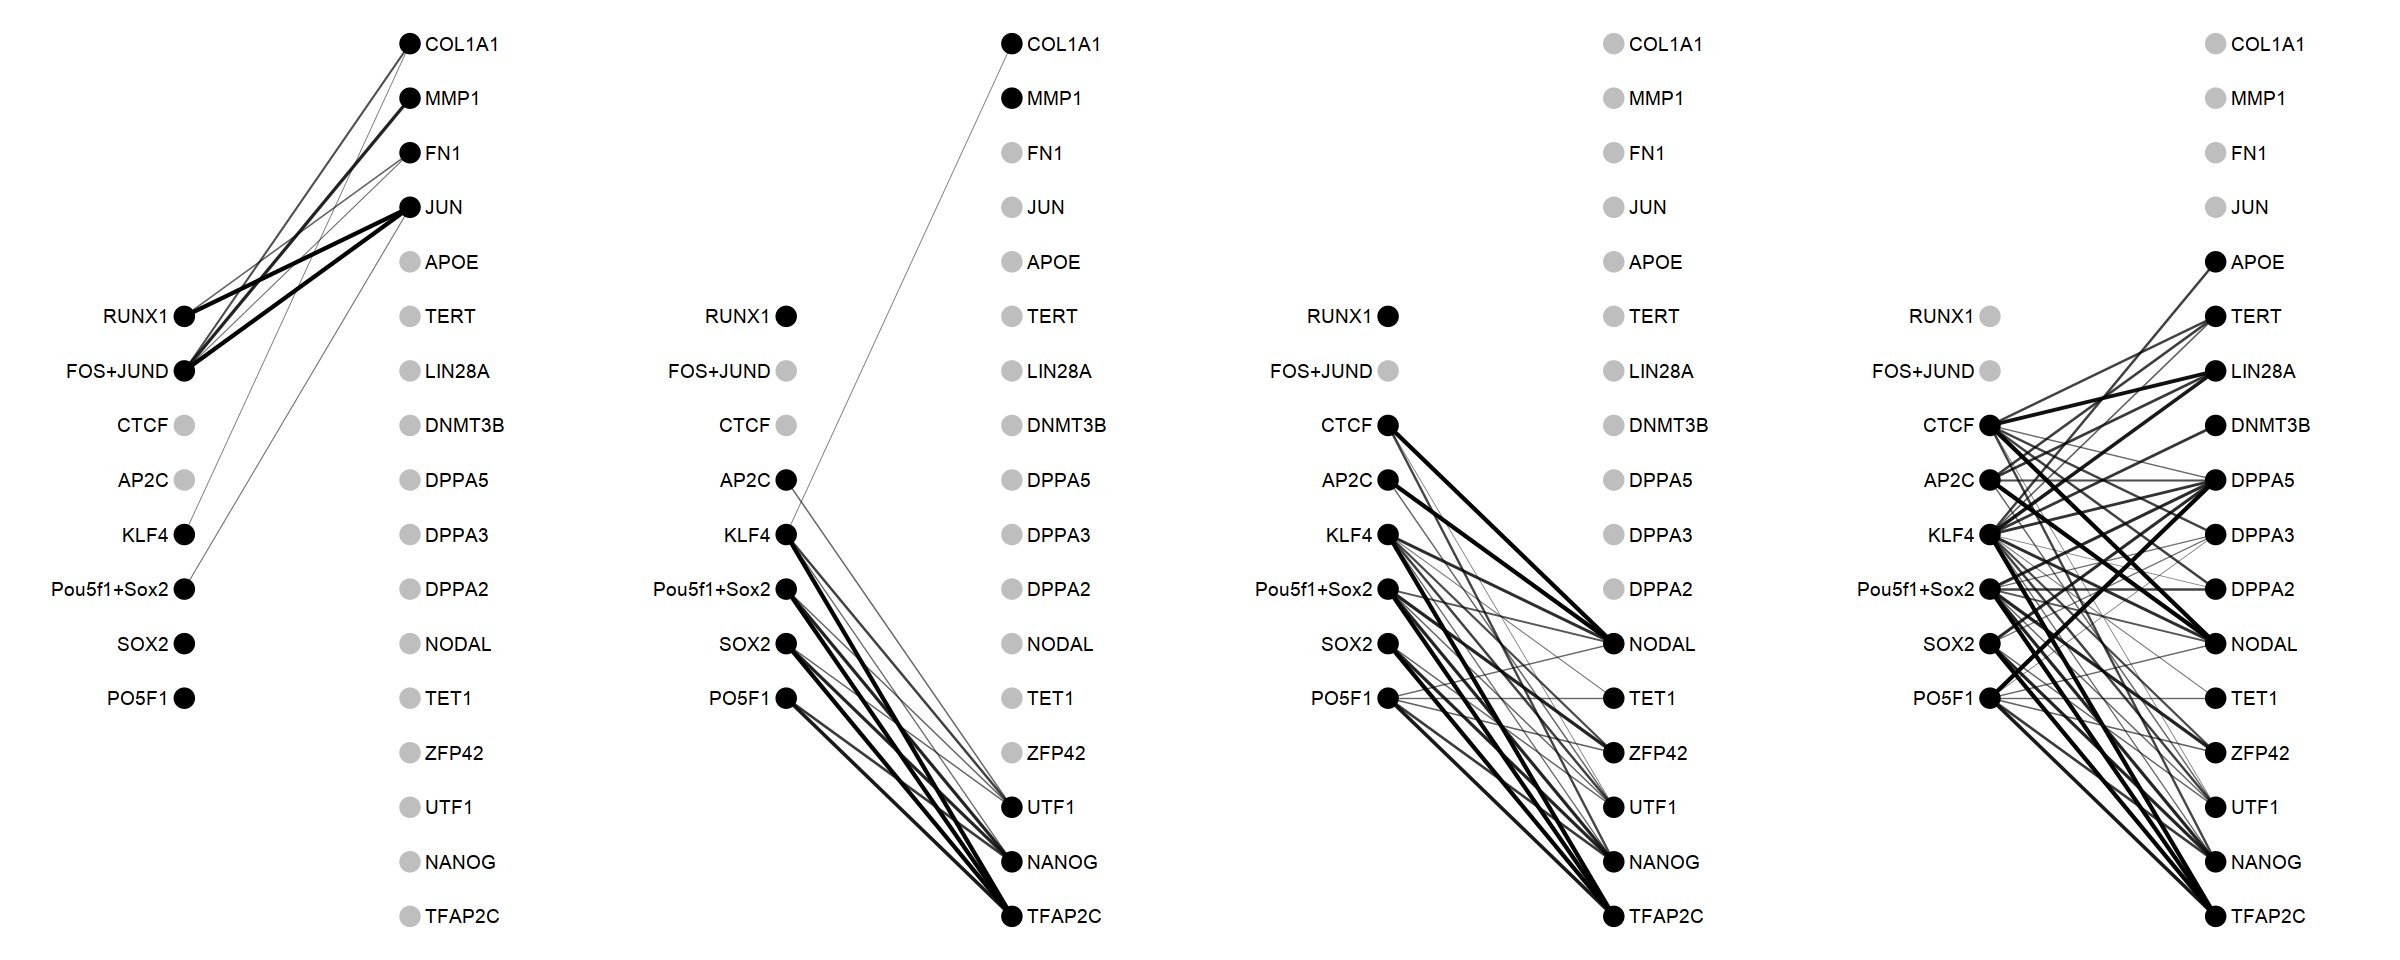

In [840]:
options(repr.plot.width = 20, repr.plot.height = 8)

plot + xlim(c(-.5,14))

---

In [ ]:
sessionInfo()